<h2>Que 1 - Why Linear Regression ??</h2>
<font size = "+1">Ans - 1. Easy to understand.  Unlike other algo like SVM, Deep Learning etc.<br>
2. Way to other algorithms. It is just like a foundation algorithm.<br>

<h4>Basically three types of LR are there.. </h4>
1. Simple LR (that only have one input and one output column.) <br>e.g., CGPA and IQ level. This Data can be used to predict the IQ based on CGPA.<br><br>
2. Multiple LR (more than one input column instead of one.)<br>
e.g., Car mileage, brand, fuel type, HP, price_for_sale. This data consists of only one output column i.e., price_for_sale. <br><br>
3. Polynomial LR (used when data is not linear completely).<br><br>



<h2> 1. Simple Linear Regression</h2>

First step in any ML algo is to Plot the data first.

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

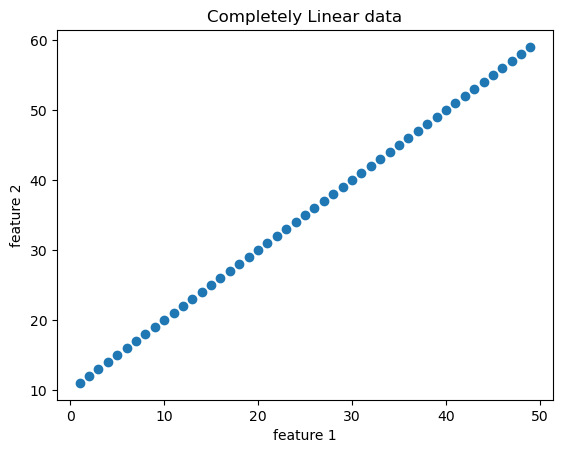

In [40]:
plt.scatter(x = range(1,50), y = range(11,60))
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("Completely Linear data")
plt.show()

What we will do in LR is plot a best fit line that passing through all the points using the equation <br> <b><i>y = mx + c </i></b>

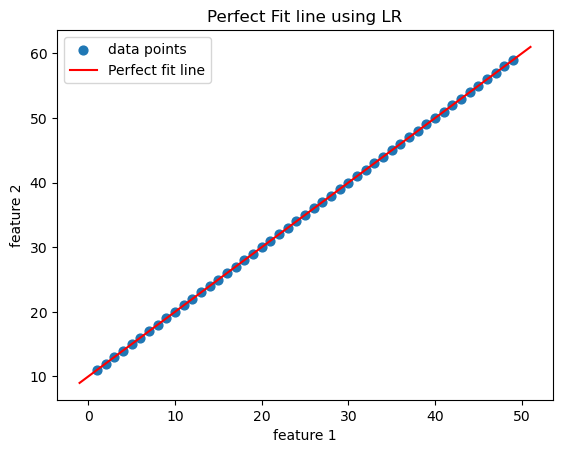

In [227]:
plt.scatter(x = range(1,50), y = range(11,60),s=40, label = "data points")
plt.plot(range(-1,52), range(9,62), color = 'r', label = "Perfect fit line")
plt.title("Perfect Fit line using LR")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()
plt.show()

Now, let see the real world data.

In [2]:
data = pd.read_csv("placement.csv")

In [43]:
data.head(5)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


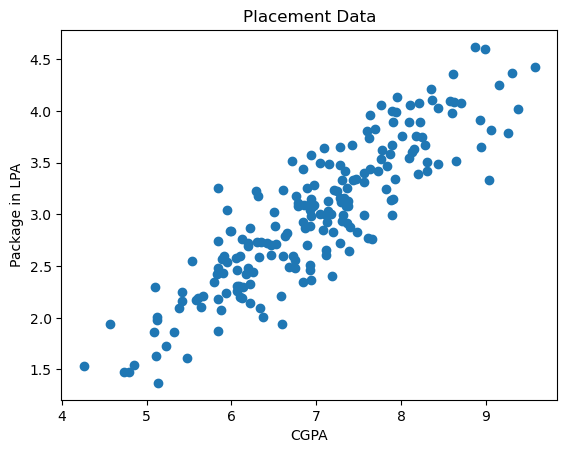

In [228]:
plt.scatter(x = data["cgpa"], y = data['package'])
plt.xlabel("CGPA")
plt.ylabel("Package in LPA")
plt.title("Placement Data")
plt.show()

Real world data is not comletely linear, but a <b>sort of linear</b>. It is because it contains noise in the data. <br>
Still, we will do the same task as before i.e., fitting a <b> Best fit Line </b> instead of perfect fit line on this data. Best fit line means that line will have minimum error on this data.<br>
What Linear regression do is, find that value of <b> m </b> and <b> c </b> in <b> y = mx + c </b> through which the line is closely passing through all the data points. This line is called <b> Best_fit_Line.</b>

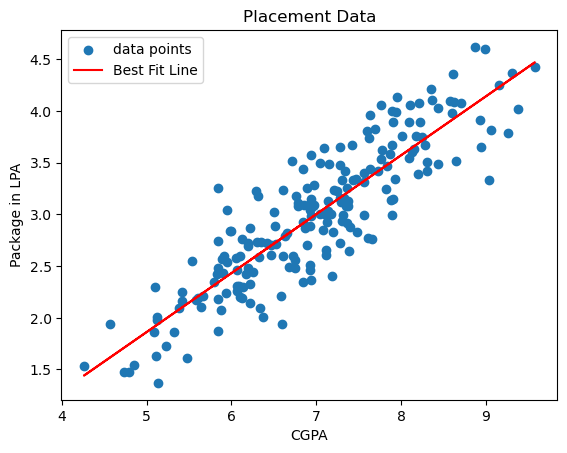

In [229]:
plt.scatter(x = data["cgpa"], y = data['package'], label = "data points")
plt.plot(data["cgpa"], (0.5696  * data['cgpa'] + -0.9857), color = 'r', label = "Best Fit Line")
plt.xlabel("CGPA")
plt.ylabel("Package in LPA")
plt.title("Placement Data")
plt.legend()
plt.show()

<h2> Let see how to build a model like this in Python.

In [75]:
x = data.iloc[:,0:1]
y = data.iloc[:, 1:]

In [77]:
x.head(5)

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


In [78]:
y.head(5)

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57


In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
lr = LinearRegression()

In [82]:
lr.fit(x_train, y_train)

LinearRegression()

In [88]:
pd.concat([x_test, y_test], axis = 1)

,cgpa,package
18,6.94,2.98
170,6.22,2.87
107,6.33,2.59
98,7.69,3.83
177,7.09,3.64
182,5.88,2.08
5,7.89,2.99
146,6.07,2.46
12,8.94,3.65
152,7.37,3.08


In [103]:
import warnings
warnings.filterwarnings('ignore')

print(lr.predict(np.array(7.28).reshape(-1,1)))
print(lr.predict(np.array(6.13).reshape(-1,1)))
print(lr.predict(np.array(8.44).reshape(-1,1)))

[[3.1660784]]
[[2.50329842]]
[[3.83462169]]


There are some errors in our model. Let see what are the values of slope and intercept our model choose.

In [112]:
display(lr.intercept_)
display(lr.coef_)

array([-1.02960704])

array([[0.57633042]])

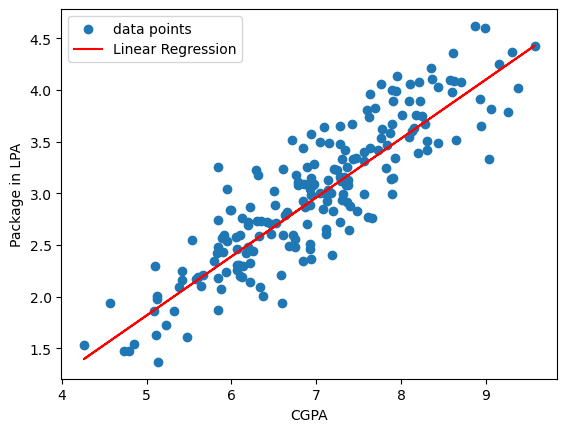

In [115]:
plt.scatter(x = data["cgpa"], y = data['package'], label = "data points")
plt.plot(data["cgpa"], (0.57 * data['cgpa'] + -1.03), color = 'r', label = "Linear Regression")
plt.xlabel("CGPA")
plt.ylabel("Package in LPA")
plt.legend()
plt.show()

<font size = "+1">Intuition behind this is <br>
<b> y = m*x + c i.e., <br>
Package = m * CGPA + c </b><br><br>
m = weightage... i.e, how much package (y) depending on CGPA (x).<br><br>
if value of slope increases, the dependancy of package (y) on cgpa (x) also increase, and if value of slope decreases, the dependancy of package (y) on cgpa also derease (x). <br><br>
Now, let say, in a data with two columns Package and Experience,<b> Package = m * Experience + c </b> and intercept c is 0.<br> if m = 0 => that means Package also become 0 i.e., Freshers do not get any salary.<br> But this is not true, as even freshers get some package. And this package at m = 0 is c. We can say it as <i> offset or intercept. </i><br>We can say, The <b>regression_constant or offset or intercept or c</b> tells us the predicted value of the dependent variable or output or c when all of the <b>independent variables or input</b> equal 0. <br><br>
The general equation of straight line in linear regression is,<br>
<b>$y_{i} = \beta_{0} + \beta_{1} * x_{i} +\epsilon $</b><br>
where, $\epsilon$ = error we make during prediction.<br><br>
Now, we understood the intuition behind Linear regression, so we will learn how to find the values of $\beta_{0}$ and $\beta_{1} $. We can find the values $\beta_{0}$ and $\beta_{1} $ in two ways:<br>
1. <u>Closed form solution</u> (i.e., using formulas that do not use derivatives) e.g., Shree dharacharya formula or quadratic formula for solving quadratic equations, OLS(Ordinary least square) method for solving $\beta_{0}$ and $\beta_{1} $.
2. <u>Non - closed form solution</u> (i.e, using formulas that use derivatives) e.g., differential equations, Gradient descend method for solving $\beta_{0}$ and $\beta_{1} $.
<br> The Algo which we have seen above i.e., Linear Regression from scikit-learn uses OLS method to solve for $\beta_{0}$ and $\beta_{1} $. The other algo like SGD regressor uses gradient descent method. OLS method is good for solving for $\beta_{0}$ and $\beta_{1} $ in low dimensional data. Gradient descent method is good for solving for $\beta_{0}$ and $\beta_{1} $ where data has more dimensions or say have more input features where OLS method will be painful.


<h3> Ordinary Least squares </h3>


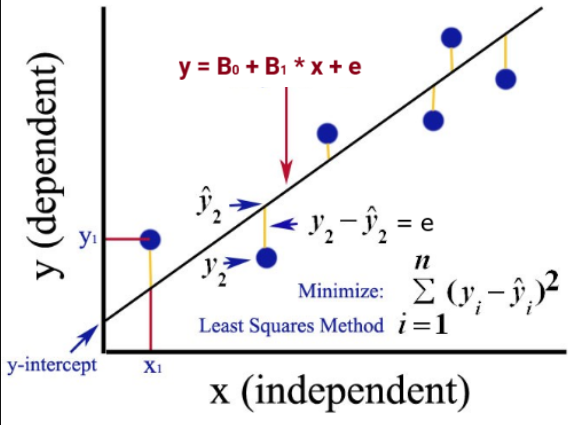

<font size = "+1">$\mathbf{\text{The general equation is}}$<br>
$y_{i} = \beta_{0} + \beta_{1} * x_{i} +\epsilon_{i} $&emsp;&emsp;&emsp;<b>------(1)</b> <br>where $y_{i}$ = dependent values, $i$ = 1,2,3....... n<br>
OLS estimates the parameters e.g., $\beta_{0}$ and $\beta_{1} $ by finding that values for the $\beta_{0}$ (constant) and $\beta_{1} $ (coefficient) that minimize the sum of the squared errors of prediction, i.e., the differences between a case’s actual score on the output variable and the score we predict for 
them using actual scores on the input variables.<br>Now, in running the regression model, what are trying to do is to minimize the sum 
of the squared errors of prediction – i.e., of the $\epsilon_{i}$ values – across all cases. 
Mathematically, this quantity can be expressed as
: 

<font size = "+1">
Sum of squared errors, <br>$SSE = \sum \limits _ {i = 0} ^ {n} \epsilon_{i} ^ 2$ &emsp;&emsp;&emsp;<b>------(2)</b>

<font size = "+1">
Specifically, what we want to do is find the values of  $\beta_{0}$ and $\beta_{1} $ that minimize the 
quantity in Equation 2 above. <br> For this, we need to 
express SSE in terms of $ \beta_{0}$ and $\beta_{1} $, take the derivatives of SSE with respect to $\beta_{0}$ and $\beta_{1} $, set these derivatives to zero, and solve for $\beta_{0}$ and $\beta_{1} $.

<font size = "+1">from (2) <br>
$\epsilon_{i} = (y_{i} - \beta_{1} * x_{i} - \beta_{0} ) $ &emsp;&emsp;&emsp;<b>------(3)</b>

$\mathbf{\text{Substituting (3) in (2)}}$
$$\displaystyle \Bigg[SSE = \sum \limits _ {i = 0} ^ {n} \epsilon_{i} ^ 2 = \sum \limits _ {i = 0} ^ {n} (y_{i} - \beta_{1} * x_{i} - \beta_{0})^2\Bigg]$$<br><br>
<font size = "+1">The least estimators of $\beta_{0}$ and $\beta_{1} $, say $\hat{\beta_{0}}$ and $\hat{\beta_{1}} $ must satisfy, $\frac{\partial (SSE)}{\partial\beta_{0}}\Bigg|_{\hat{\beta_{0}}  \hat{\beta_{1}}} = 0$ and $\frac{\partial (SSE)}{\partial\beta_{1}} \Bigg|_{\hat{\beta_{0}}  \hat{\beta_{1}}}= 0$<br>
(i) differentiating w.r.t $\beta_{0}$, <br>
=> &emsp;$\frac{\partial (SSE)}{\partial\beta_{0}}\Bigg|_{\hat{\beta_{0}}  \hat{\beta_{1}}} = \frac{\partial \sum\limits _ {i = 0} ^ {n}(y_{i} - \hat{\beta_{1}} * x_{i} - \hat{\beta_{0}} )^2}{\partial \hat{\beta_{0}}} = 0$<br>
=> &emsp;$-2 * \sum\limits _ {i = 0} ^ {n}(y_{i} - \hat{\beta_{1}} * x_{i} - \hat{\beta_{0}} ) = 0$<br>
=> &emsp;$\sum\limits _ {i = 0} ^ {n}(y_{i}) - \hat{\beta_{1}} * \sum\limits _ {i = 0} ^ {n}(x_{i}) - n * \hat{\beta_{0}} = 0$<br>
=> &emsp;$\frac{\sum\limits _ {i = 0} ^ {n}(y_{i}) - \hat{\beta_{1}} * \sum\limits _ {i = 0}^{n}(x_{i})}{n} = \hat{\beta_{0}}$<br>
=> &emsp;$\frac{\sum\limits _ {i = 0} ^ {n}(y_{i})}{n} - \frac{\hat{\beta_{1}} * \sum\limits _ {i = 0}^{n}(x_{i})}{n} = \hat{\beta_{0}}$<br>
=> &emsp;<b>$\bar{y} -  \hat{\beta_{1}} * \bar{x} =  \hat{\beta_{0}}$ &emsp; &emsp;-------(4) </b><br><br>
(ii) differentiating w.r.t $\beta_{1}$, <br>
=> &emsp;$\frac{\partial (SSE)}{\partial\beta_{1}}\Bigg|_{\hat{\beta_{0}}  \hat{\beta_{1}}} = \frac{\partial \sum\limits _ {i = 0} ^ {n}(y_{i} - \hat{\beta_{1}} * x_{i} - \hat{\beta_{0}} )^2}{\partial \hat{\beta_{1}}} = 0$<br>
=> &emsp;$-2 * \sum\limits _ {i = 0} ^ {n}(y_{i} - \hat{\beta_{1}} * x_{i} - \hat{\beta_{0}} ) * x_{i} = 0$<br>
Substituting the value of $\hat{\beta_{0}}$ from (4), <br>
=> &emsp;$\sum\limits _ {i = 0} ^ {n}(y_{i} - \hat{\beta_{1}} * x_{i} - (\bar{y} - \hat{\beta_{1}} * \bar{x})) = 0$<br>
=> &emsp;$\sum\limits _ {i = 0} ^ {n}((y_{i} - \bar{y}) - \hat{\beta_{1}} * (x_{i} - \bar{x})) = 0$<br>
=> &emsp;$\hat{\beta_{1}} = \frac{\sum\limits _ {i = 0} ^ {n}(y_{i} - \bar{y})}{\sum\limits _ {i = 0} ^ {n}(x_{i} - \bar{x})}$<br>
=> &emsp;$\hat{\beta_{1}} = \frac{\sum\limits _ {i = 0} ^ {n}(y_{i} - \bar{y}) * (x_{i} - \bar{x})}{\sum\limits _ {i = 0} ^ {n}(x_{i} - \bar{x})^2}$ &emsp;&emsp;<b>--------- (5)</B><br>
using (4) and (5), we will find that values of $\beta_{1} \textrm { and  } \beta_{0}$, that will minimize the error $\epsilon$ .

In [122]:
# converting eq(4) and (5) into python function,
def ools(x, y):
    assert(len(x) == len(y))
    import numpy as np
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    Nr = 0
    Dr = 0
    for i in range(len(x)):
        Nr += (y[i] - mean_y)*(x[i] - mean_x)
        Dr += (x[i] - mean_x)**2
    beta1 = Nr / Dr
    beta0 = mean_y - (beta1 * mean_x)
    return (beta0, beta1)

In [144]:
ools(x_train.reset_index()['cgpa'], y_train.reset_index()['package'])

(-1.0296070415163068, 0.5763304184634158)

In [120]:
display(lr.intercept_)
display(lr.coef_)

array([-1.02960704])

array([[0.57633042]])

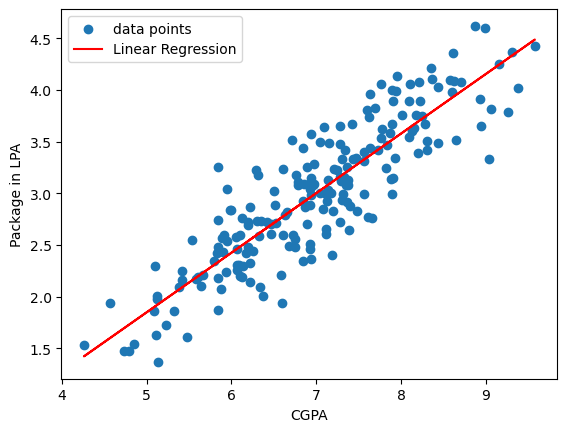

In [146]:
plt.scatter(x = data["cgpa"], y = data['package'], label = "data points")
plt.plot(data["cgpa"], (0.576 * data['cgpa'] + -1.03), color = 'r', label = "Linear Regression")
plt.xlabel("CGPA")
plt.ylabel("Package in LPA")
plt.legend()
plt.show()

<h3> Relationship between slope and squared errors</h3>

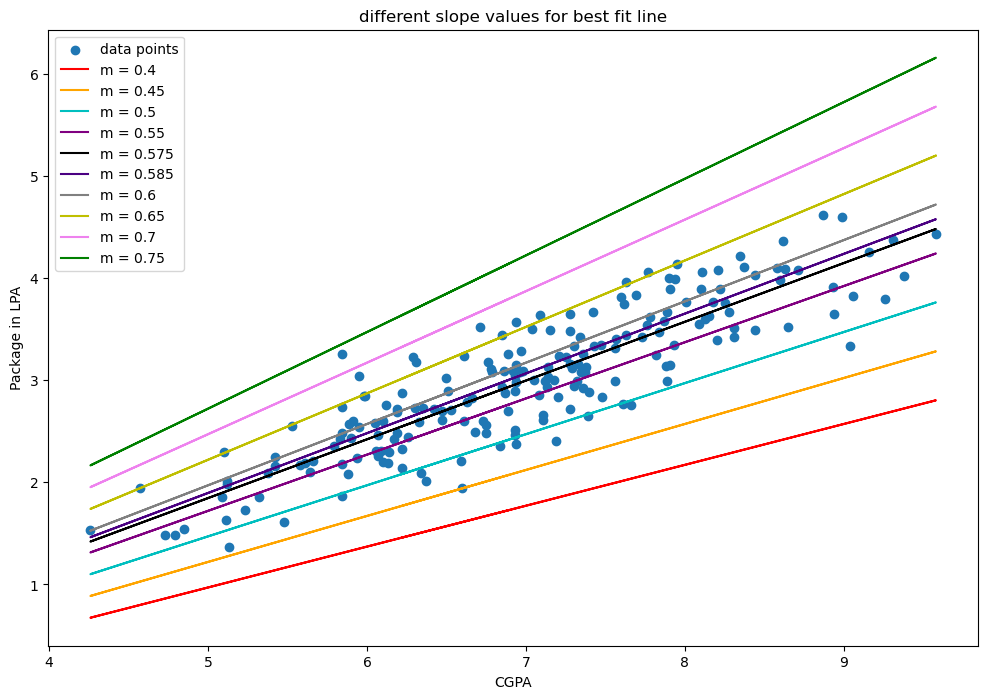

In [232]:
plt.figure(figsize = (12,8))
plt.scatter(x = data["cgpa"], y = data['package'], label = "data points")
plt.plot(data["cgpa"], (0.4 * data['cgpa'] + -1.03), color = 'r', label = "m = 0.4")
plt.plot(data["cgpa"], (0.45 * data['cgpa'] + -1.03), color = 'orange', label = "m = 0.45")
plt.plot(data["cgpa"], (0.5 * data['cgpa'] + -1.03), color = 'c', label = "m = 0.5")
plt.plot(data["cgpa"], (0.55 * data['cgpa'] + -1.03), color = 'purple', label = "m = 0.55")
plt.plot(data["cgpa"], (0.575 * data['cgpa'] + -1.03), color = 'black', label = "m = 0.575")
plt.plot(data["cgpa"], (0.585 * data['cgpa'] + -1.03), color = 'indigo', label = "m = 0.585")
plt.plot(data["cgpa"], (0.6 * data['cgpa'] + -1.03), color = 'grey', label = "m = 0.6")
plt.plot(data["cgpa"], (0.65 * data['cgpa'] + -1.03), color = 'y', label = "m = 0.65")
plt.plot(data["cgpa"], (0.7 * data['cgpa'] + -1.03), color = 'violet', label = "m = 0.7")
plt.plot(data["cgpa"], (0.75 * data['cgpa'] + -1.03), color = 'g', label = "m = 0.75")
plt.xlabel("CGPA")
plt.ylabel("Package in LPA")
plt.title("different slope values for best fit line")
plt.legend()
plt.show()

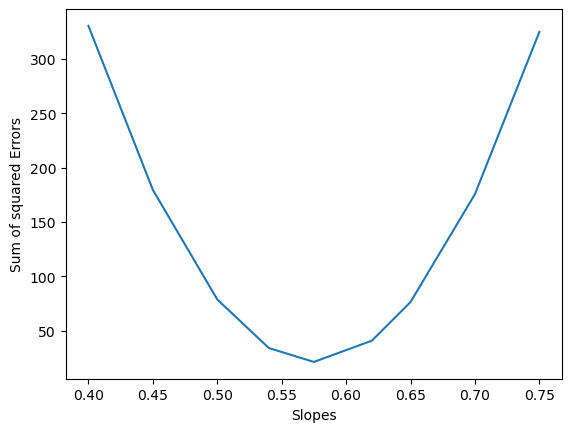

In [223]:
slopes = [0.4, 0.45, 0.5, 0.54, 0.575, 0.62, 0.65, 0.7, 0.75]
intercept = -1.03
errors = []
for i in slopes:
    sum = 0
    for j in range(len(data['package'])):
        sum += (data['package'].values[j] - (i * data['cgpa'].values[j] + intercept))**2
    errors.append(sum)
plt.plot(slopes, errors)
plt.xlabel("Slopes")
plt.ylabel("Sum of squared Errors")
plt.show()

In [224]:
pd.DataFrame({'squared_errors_by_slope':errors, 'slope':slopes})

,squared_errors_by_slope,slope
0,330.411924,0.400
1,179.609483,0.450
2,78.812050,0.500
3,34.177708,0.540
4,21.375288,0.575
5,40.918638,0.620
6,76.449792,0.650
7,175.672386,0.700
8,324.899987,0.750


<h3> Relationship between intercept and squared errors</h3>

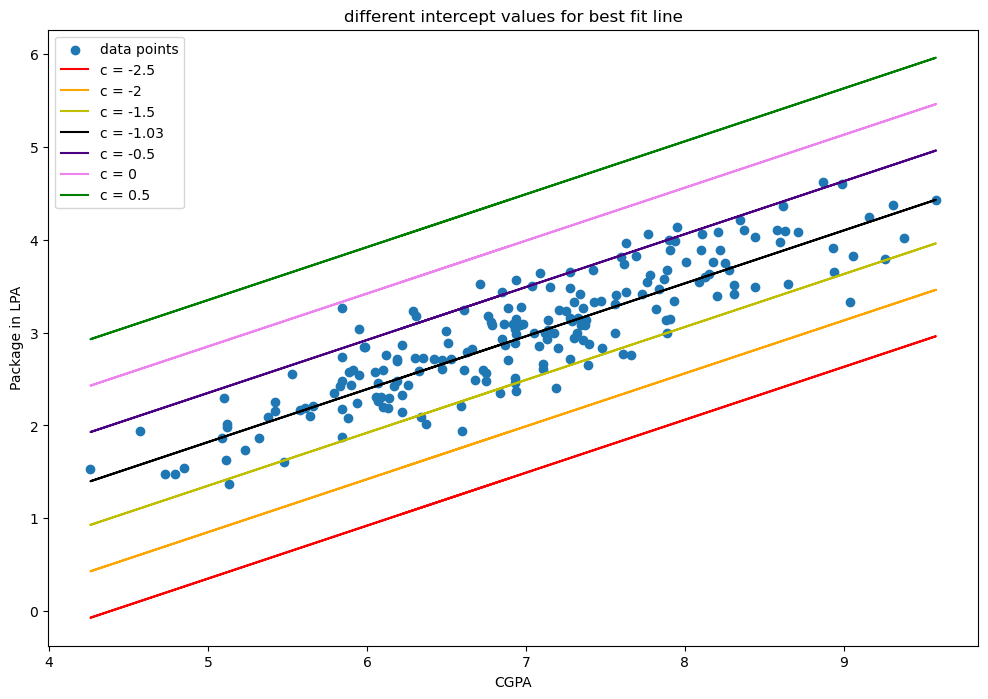

In [231]:
plt.figure(figsize = (12,8))
plt.scatter(x = data["cgpa"], y = data['package'], label = "data points")
plt.plot(data["cgpa"], (0.57 * data['cgpa'] + -2.5), color = 'r', label = "c = -2.5")
plt.plot(data["cgpa"], (0.57 * data['cgpa'] + -2), color = 'orange', label = "c = -2")
plt.plot(data["cgpa"], (0.57 * data['cgpa'] + -1.5), color = 'y', label = "c = -1.5")
plt.plot(data["cgpa"], (0.57 * data['cgpa'] + -1.03), color = 'black', label = "c = -1.03")
plt.plot(data["cgpa"], (0.57 * data['cgpa'] + -0.5), color = 'indigo', label = "c = -0.5")
plt.plot(data["cgpa"], (0.57 * data['cgpa'] + 0), color = 'violet', label = "c = 0")
plt.plot(data["cgpa"], (0.57 * data['cgpa'] + 0.5), color = 'g', label = "c = 0.5")
plt.xlabel("CGPA")
plt.ylabel("Package in LPA")
plt.title("different intercept values for best fit line")
plt.legend()
plt.show()

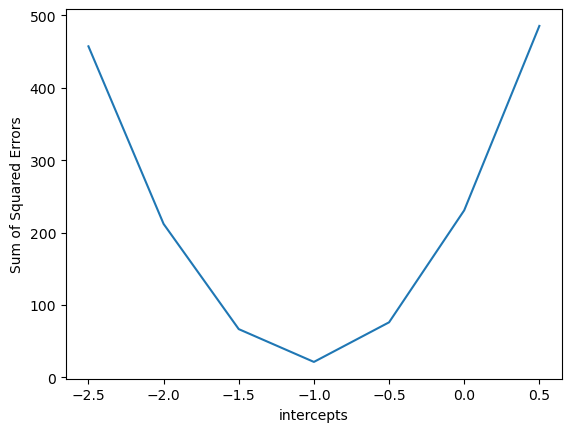

In [225]:
slope = 0.575
intercepts = np.arange(-2.5, 0.6, 0.5)
errors = []
for i in intercepts:
    sum = 0
    for j in range(len(data['package'])):
        sum += (data['package'].values[j] - (slope * data['cgpa'].values[j] + i))**2
    errors.append(sum)
plt.plot(intercepts, errors)
plt.xlabel("intercepts")
plt.ylabel("Sum of Squared Errors")
plt.show()

In [226]:
pd.DataFrame({'squared_errors_by_intercepts':errors, 'intercept':intercepts})

,squared_errors_by_intercepts,intercept
0,457.384638,-2.5
1,212.082138,-2.0
2,66.779638,-1.5
3,21.477138,-1.0
4,76.174638,-0.5
5,230.872138,0.0
6,485.569638,0.5


<h3> Relationship between both intercept & slope with squared errors</h3>

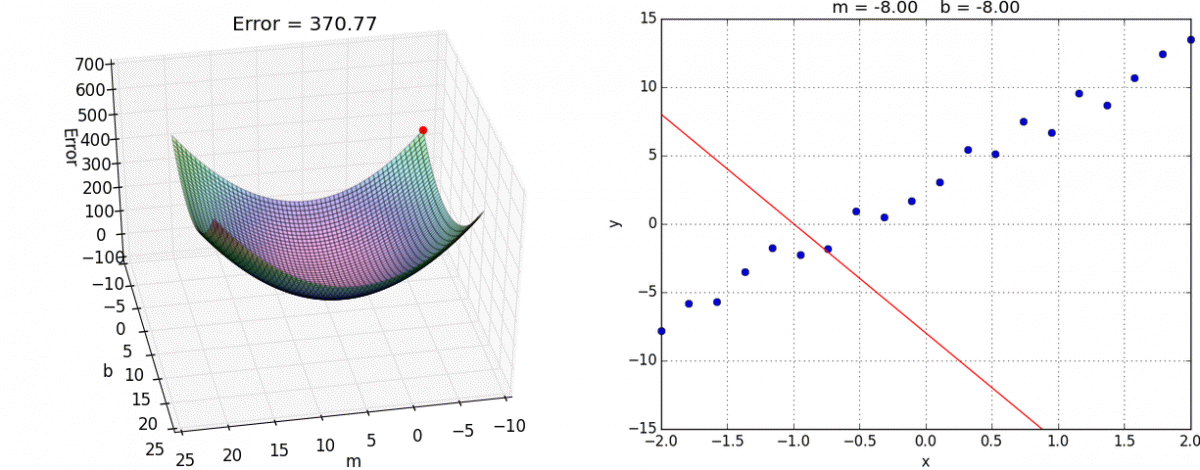